In [1]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 33.9 MB/s 
     |████████████████████████████████| 346 kB 68.5 MB/s 
     |████████████████████████████████| 6.6 MB 53.4 MB/s 
     |████████████████████████████████| 596 kB 51.3 MB/s 
     |████████████████████████████████| 86 kB 6.8 MB/s 
     |████████████████████████████████| 86 kB 7.9 MB/s 
     |████████████████████████████████| 1.1 MB 59.9 MB/s 
     |████████████████████████████████| 140 kB 57.4 MB/s 
     |████████████████████████████████| 212 kB 54.4 MB/s 
     |████████████████████████████████| 127 kB 17.2 MB/s 
     |████████████████████████████████| 144 kB 56.6 MB/s 
     |████████████████████████████████| 94 kB 793 kB/s 
     |████████████████████████████████| 271 kB 54.8 MB/s 
     |████████████████████████████████| 112 kB 15.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstallin

In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
os.chdir('/content/gdrive/My Drive/tfg_victor') ## mount Google Drive path where files are saved
!ls

Mounted at /content/gdrive
fact_check_bool.csv    missinfo-claims.csv	 tmp_trainer
fact_check.csv	       model_bool_distil-bert.m
fact_check_number.csv  tfg_victor_res


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('fact_check.csv', sep=' ')
df.head()

,veracity,claims
0,FALSE,“The vast majority of individuals that we’re r...
1,FALSE,Bibles are not allowed in schools but are enco...
2,MOSTLY-FALSE,"“When unemployment goes down, inflation goes up.”"
3,TRUE,U.S. deaths from COVID-19 hit 1 million.
4,BLATANT-LIE,A reporter who covered the Buffalo supermarket...


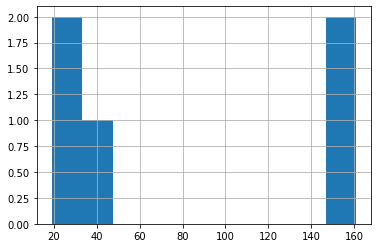

In [5]:
df.veracity.value_counts().hist()

In [6]:
import numpy as np

In [7]:
#plot(np.histogram(df.veracity.value_counts()))

In [8]:
df
df.veracity.value_counts()

FALSE           161
BLATANT-LIE     149
MOSTLY-FALSE     38
TRUE             24
MOSTLY-TRUE      19
Name: veracity, dtype: int64

In [9]:
df["veracity"]

0             FALSE
1             FALSE
2      MOSTLY-FALSE
3              TRUE
4       BLATANT-LIE
           ...     
386           FALSE
387     BLATANT-LIE
388     MOSTLY-TRUE
389            TRUE
390     BLATANT-LIE
Name: veracity, Length: 391, dtype: object

In [10]:
df["veracity"][df["veracity"]=="TRUE"] = 5
df["veracity"][df["veracity"]=="MOSTLY-TRUE"] = 4
df["veracity"][df["veracity"]=="MOSTLY-FALSE"] = 3
df["veracity"][df["veracity"]=="FALSE"] = 2
df["veracity"][df["veracity"]=="BLATANT-LIE"] = 1
df["veracity"][df["veracity"]=="NO-EVIDENCE"] = 0

In [11]:
df.to_csv('fact_check_number.csv', header=True, index=False)
df = pd.read_csv('fact_check_number.csv', sep=',')
df

,veracity,claims
0,2,“The vast majority of individuals that we’re r...
1,2,Bibles are not allowed in schools but are enco...
2,3,"“When unemployment goes down, inflation goes up.”"
3,5,U.S. deaths from COVID-19 hit 1 million.
4,1,A reporter who covered the Buffalo supermarket...
...,...,...
386,2,CDC data show mass vaccination with the COVID-...
387,1,Federal Reserve is owned by a small group of b...
388,4,Gov. Tony Evers has “only gotten one-third of ...
389,5,Did former U.S. President Donald Trump call R...


# Creamos o conxunto de datos booleano

In [12]:
import pandas as pd
#Cargamos o drive
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
os.chdir('/content/gdrive/My Drive/tfg_victor') ## mount Google Drive path where files are saved
!ls

Mounted at /content/gdrive
fact_check_bool.csv    missinfo-claims.csv	 tmp_trainer
fact_check.csv	       model_bool_distil-bert.m
fact_check_number.csv  tfg_victor_res


In [13]:
df = pd.read_csv('fact_check.csv', sep=' ')
df.head()

,veracity,claims
0,FALSE,“The vast majority of individuals that we’re r...
1,FALSE,Bibles are not allowed in schools but are enco...
2,MOSTLY-FALSE,"“When unemployment goes down, inflation goes up.”"
3,TRUE,U.S. deaths from COVID-19 hit 1 million.
4,BLATANT-LIE,A reporter who covered the Buffalo supermarket...


In [14]:
df.veracity.value_counts()

FALSE           161
BLATANT-LIE     149
MOSTLY-FALSE     38
TRUE             24
MOSTLY-TRUE      19
Name: veracity, dtype: int64

In [15]:
indices = df[df["veracity"] == "NO-EVIDENCE"].index
df.drop(indices, inplace=True)

In [16]:
#df["veracity"][df["veracity"]=="NO-EVIDENCE"]

In [17]:
df["veracity"][df["veracity"]=="TRUE"] = 1
df["veracity"][df["veracity"]=="MOSTLY-TRUE"] = 1
df["veracity"][df["veracity"]=="MOSTLY-FALSE"] = 0
df["veracity"][df["veracity"]=="FALSE"] = 0
df["veracity"][df["veracity"]=="BLATANT-LIE"] = 0

df["veracity"][df["veracity"]=="NO-EVIDENCE"] = 0

In [18]:
df = pd.read_csv('fact_check_bool.csv', sep=',')
df.veracity.value_counts()

0    348
1     43
Name: veracity, dtype: int64

In [19]:
df.to_csv('fact_check_bool.csv', header=True, index=False)
df = pd.read_csv('fact_check_bool.csv', sep=',')
df

,veracity,claims
0,0,“The vast majority of individuals that we’re r...
1,0,Bibles are not allowed in schools but are enco...
2,0,"“When unemployment goes down, inflation goes up.”"
3,1,U.S. deaths from COVID-19 hit 1 million.
4,0,A reporter who covered the Buffalo supermarket...
...,...,...
386,0,CDC data show mass vaccination with the COVID-...
387,0,Federal Reserve is owned by a small group of b...
388,1,Gov. Tony Evers has “only gotten one-third of ...
389,1,Did former U.S. President Donald Trump call R...


# Creamos un dataset binario equilibrado

In [20]:
import pandas as pd
#Cargamos o drive
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
os.chdir('/content/gdrive/My Drive/tfg_victor') ## mount Google Drive path where files are saved
!ls

Mounted at /content/gdrive
fact_check_bool.csv    missinfo-claims.csv	 tmp_trainer
fact_check.csv	       model_bool_distil-bert.m
fact_check_number.csv  tfg_victor_res


In [21]:
#Comprobamos que se estea cargando correctamente
df = pd.read_csv('fact_check.csv', sep=' ')
df.head()

,veracity,claims
0,FALSE,“The vast majority of individuals that we’re r...
1,FALSE,Bibles are not allowed in schools but are enco...
2,MOSTLY-FALSE,"“When unemployment goes down, inflation goes up.”"
3,TRUE,U.S. deaths from COVID-19 hit 1 million.
4,BLATANT-LIE,A reporter who covered the Buffalo supermarket...


In [22]:
#Eliminamos as etiquetas NO-EVIDENCE
indices = []
indices = df[df["veracity"] == "NO-EVIDENCE"].index
df.drop(indices, inplace=True)

In [23]:
#Cambiamos a calsificación binaria
df["veracity"][df["veracity"]=="TRUE"] = 1
df["veracity"][df["veracity"]=="MOSTLY-TRUE"] = 1
df["veracity"][df["veracity"]=="MOSTLY-FALSE"] = 0
df["veracity"][df["veracity"]=="FALSE"] = 0
df["veracity"][df["veracity"]=="BLATANT-LIE"] = 0

# Bibliotecas e funcións para os modelos.

In [24]:
!pip install transformers datasets
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding, TrainingArguments, Trainer
from datasets import load_dataset, Value, Features, ClassLabel, load_metric

def tokenize_function(batch):
    return tokenizer(batch["claims"], truncation=True)

'''
Function that evaluates the performance of our classification model
'''
def compute_metrics(eval_preds):
    metric1 = load_metric("accuracy")
    metric2 = load_metric("f1")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric1.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = metric2.compute(predictions=predictions, references=labels, average='macro')["f1"]
    return {"accuracy": accuracy, "f1": f1}


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Adestramos o modelo coa granularidade dispoible

##bert-base-uncased

In [25]:
data = 'fact_check_number.csv' #fact_check_number.csv bert-base-uncased
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased") # distilbert-base-uncased-finetuned-sst-2-english

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

## Feature mapping and label setting

In [26]:
features = Features({'claims': Value('string'),
                     'veracity': ClassLabel(names=['TRUE', 'MOSTLY-TRUE', 'MOSTLY-FALSE', 'FALSE', 'BLATANT-LIE', 'NO-EVIDENCE'])})
dataset_raw = load_dataset('csv', data_files=data, delimiter=',', features=features)["train"]
print(dataset_raw)
dataset = dataset_raw.shuffle(seed=42).train_test_split(test_size=0.15)

dataset = dataset.map(lambda examples: {'labels': examples['veracity']}, remove_columns=['veracity'])

Using custom data configuration default-98b04953b3ce1449


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-98b04953b3ce1449/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['claims', 'veracity'],
    num_rows: 391
})


  0%|          | 0/332 [00:00<?, ?ex/s]

  0%|          | 0/59 [00:00<?, ?ex/s]

In [27]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [28]:
model_number = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6)
training_args = TrainingArguments(
    output_dir="./tfg_victor_res", 
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    # per_device_train_batch_size=16,
    # per_device_eval_batch_size=16,
    num_train_epochs=5,
    # weight_decay=0.01,
)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [29]:
import time
inicio = time.time()
trainer_number = Trainer(
    model_number,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
trainer_number.evaluate()
trainer_number.train()
fin = time.time()
print(fin - inicio)

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8


The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 332
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 210


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.278993,0.457627,0.196896
2,No log,1.222150,0.559322,0.247298
3,No log,1.299236,0.491525,0.216771
4,No log,1.293269,0.542373,0.237147
5,No log,1.319280,0.491525,0.215201


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The follow

52.59989833831787


## Distilbert

In [30]:
data = 'fact_check_number.csv' #fact_check_number.csv bert-base-uncased
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") # distilbert-base-uncased-finetuned-sst-2-english


features = Features({'claims': Value('string'),
                     'veracity': ClassLabel(names=['TRUE', 'MOSTLY-TRUE', 'MOSTLY-FALSE', 'FALSE', 'BLATANT-LIE', 'NO-EVIDENCE'])})
dataset_raw = load_dataset('csv', data_files=data, delimiter=',', features=features)["train"]
print(dataset_raw)
dataset = dataset_raw.shuffle(seed=42).train_test_split(test_size=0.15)

dataset = dataset.map(lambda examples: {'labels': examples['veracity']}, remove_columns=['veracity'])

tokenized_dataset = dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model_number_1 = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6)
training_args = TrainingArguments(
    output_dir="./tfg_victor_res", 
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    # per_device_train_batch_size=16,
    # per_device_eval_batch_size=16,
    num_train_epochs=5,
    # weight_decay=0.01,
)

https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpgkfaeopl


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/8c8624b8ac8aa99c60c912161f8332de003484428c47906d7ff7eb7f73eecdbb.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
https://huggingface.co/distilbert-base-uncased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpd2whl4lz


Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
creating metadata file for /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.0

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpncetdd38


Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
creating metadata file for /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10c3c92122b827d92eb2d34ce94ee79ba486c.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/75abb59d7a06f4f640158a9bfcde005264e59e8d566781ab1415b139d2e4c603.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-59ce31ada63d1e15/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['claims', 'veracity'],
    num_rows: 391
})


  0%|          | 0/332 [00:00<?, ?ex/s]

  0%|          | 0/59 [00:00<?, ?ex/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

storing https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
creating metadata file for /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias'

In [31]:
import time
inicio = time.time()
trainer_number = Trainer(
    model_number,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
trainer_number.evaluate()
trainer_number.train()
fin = time.time()
print(fin - inicio)

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8


The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 332
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 210


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.855688,0.711864,0.317379
2,No log,0.792929,0.728814,0.325815
3,No log,0.764861,0.728814,0.333109
4,No log,0.774443,0.728814,0.333109
5,No log,0.785625,0.728814,0.335866


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The follow

33.63721776008606


# Adestramos o modelo cun conxunto binario desbalanceado.

## bert-base-uncased

In [32]:
data = 'fact_check_bool.csv' #fact_check_number.csv bert-base-uncased
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased") # distilbert-base-uncased-finetuned-sst-2-english

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/resolve/ma

In [33]:
#Features e dataset
features = Features({'claims': Value('string'),
                     'veracity': ClassLabel(names=['0','1'])})
dataset_raw = load_dataset('csv', data_files=data, delimiter=',', features=features)["train"]
print(dataset_raw)
dataset = dataset_raw.shuffle(seed=42).train_test_split(test_size=0.15)

dataset = dataset.map(lambda examples: {'labels': examples['veracity']}, remove_columns=['veracity'])

#Tokenizamos o dataset e prepramos o dato_collector
tokenized_dataset = dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


Using custom data configuration default-3da8c0040bb0c10d


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-3da8c0040bb0c10d/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['claims', 'veracity'],
    num_rows: 391
})


  0%|          | 0/332 [00:00<?, ?ex/s]

  0%|          | 0/59 [00:00<?, ?ex/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [34]:
# Configuramos o modelo
model_bool = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
training_args = TrainingArguments(
    output_dir="./tfg_victor_res", 
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    # per_device_train_batch_size=16,
    # per_device_eval_batch_size=16,
    num_train_epochs=5,
    # weight_decay=0.01,
)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-uncased/re

In [35]:
#Executamos o adestramento
trainer_bool = Trainer(
    model_bool,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
#trainer_bool.evaluate()
#trainer_bool.train()

In [36]:
trainer_bool = Trainer(
    model_bool,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [37]:
import time
inicio = time.time()
eval = trainer_bool.evaluate()
train = trainer_bool.train()
fin = time.time()
print(fin - inicio)

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8


The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 332
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 210


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.422567,0.864407,0.463636
2,No log,0.431311,0.864407,0.463636
3,No log,0.499017,0.864407,0.463636
4,No log,0.479236,0.864407,0.463636
5,No log,0.493072,0.864407,0.463636


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The follow

33.08313465118408


## distilbert-base-uncased

In [38]:
data = 'fact_check_bool.csv' #fact_check_number.csv bert-base-uncased
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") 

#Features e dataset
features = Features({'claims': Value('string'),
                     'veracity': ClassLabel(names=['0','1'])})
dataset_raw = load_dataset('csv', data_files=data, delimiter=',', features=features)["train"]
print(dataset_raw)
dataset = dataset_raw.shuffle(seed=42).train_test_split(test_size=0.15)

dataset = dataset.map(lambda examples: {'labels': examples['veracity']}, remove_columns=['veracity'])

#Tokenizamos o dataset e prepramos o dato_collector
tokenized_dataset = dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


# Configuramos o modelo
model_bool = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
training_args = TrainingArguments(
    output_dir="./tfg_victor_res", 
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    # per_device_train_batch_size=16,
    # per_device_eval_batch_size=16,
    num_train_epochs=5,
    # weight_decay=0.01,
)

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.3",
  "vocab_size": 30522
}

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10

  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /root/.cache/huggingface/datasets/csv/default-3da8c0040bb0c10d/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-e14484a27ce04048.arrow
Loading cached split indices for dataset at /root/.cache/huggingface/datasets/csv/default-3da8c0040bb0c10d/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-a0a9ac87bd9377e8.arrow and /root/.cache/huggingface/datasets/csv/default-3da8c0040bb0c10d/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-4f9c426d5528b710.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-3da8c0040bb0c10d/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-237e3fcc55ffbc03.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-3da8c0040bb0c10d/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-f7356ce49b5daa96.arrow


Dataset({
    features: ['claims', 'veracity'],
    num_rows: 391
})


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.3",
  "vocab_size": 30522
}

loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9c169103d7e5a

In [39]:
import time
inicio = time.time()
trainer_bool = Trainer(
    model_bool,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)
eval = trainer_bool.evaluate()
train = trainer_bool.train()
fin = time.time()
print(fin - inicio)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8


The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 332
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 210


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.446064,0.864407,0.463636
2,No log,0.410731,0.864407,0.463636
3,No log,0.401528,0.864407,0.463636
4,No log,0.406967,0.864407,0.463636
5,No log,0.397596,0.864407,0.463636


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 59
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examp

23.537888288497925


In [40]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['claims', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 332
    })
    test: Dataset({
        features: ['claims', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 59
    })
})

In [41]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['claims', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 332
    })
    test: Dataset({
        features: ['claims', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 59
    })
})

# EXEMPLO FUNCIONAL

In [42]:
df = pd.read_csv('missinfo-claims.csv', sep=',')
df.veracity.value_counts()

0    25
1    25
Name: veracity, dtype: int64

In [43]:
trainer_bool.save_model("model_bool_distil-bert.m")

Saving model checkpoint to model_bool_distil-bert.m
Configuration saved in model_bool_distil-bert.m/config.json
Model weights saved in model_bool_distil-bert.m/pytorch_model.bin
tokenizer config file saved in model_bool_distil-bert.m/tokenizer_config.json
Special tokens file saved in model_bool_distil-bert.m/special_tokens_map.json


In [44]:
from transformers import AutoModel
model_bool_distil_trained = AutoModelForSequenceClassification.from_pretrained("model_bool_distil-bert.m")

loading configuration file model_bool_distil-bert.m/config.json
Model config DistilBertConfig {
  "_name_or_path": "model_bool_distil-bert.m",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.19.3",
  "vocab_size": 30522
}

loading weights file model_bool_distil-bert.m/pytorch_model.bin
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at model_bool_distil-bert.m.
If 

In [45]:
## Proba de execución do modelo
##VICTOR

data = 'missinfo-claims.csv' #fact_check_number.csv bert-base-uncased
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") 

#Features e dataset
features = Features({'claims': Value('string'),
                     'veracity': ClassLabel(names=['0','1'])})
dataset_raw = load_dataset('csv', data_files=data, delimiter=',', features=features)['train']
#Poño a liña de separar pq no caso anterior dinos que hay un problema ao ler claim e veracity
dataset = dataset_raw.map(lambda examples: {'labels': examples['veracity']}, remove_columns=['veracity'])

#Tokenizamos o dataset e prepramos o dato_collector
tokenized_dataset = dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

#Intentamos co modelo gardado pero parece que o estmaos recuperadno mal
#model_path = "model_bool_distil-bert.m"
#model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=2)
#trainer_aux = Trainer(model)
#raw_pred,_,_ = trainer_aux.predict(tokenized_dataset)
#Empregamos o traine anterior que ten o modelo xa cargado
raw_pred,_,_ = trainer_bool.predict(tokenized_dataset)
print(raw_pred)

# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1) #### Esto devólveche as clases predicidas e coas labels podes computar a accuracy e o f1, cas funcións que tés arriba

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.3",
  "vocab_size": 30522
}

loading file https://huggingface.co/distilbert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/0e1bbfda7f63a99bb52e3915dcf10

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-d857a74d7efa083a/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?ex/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: claims. If claims are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 50
  Batch size = 8


[[ 1.5918273 -1.588476 ]
 [ 1.6876276 -1.6413364]
 [ 1.5537442 -1.4975498]
 [ 1.5474586 -1.7482086]
 [ 1.4769707 -1.4653169]
 [ 1.7051294 -1.716906 ]
 [ 1.551475  -1.6903218]
 [ 1.6705396 -1.6634493]
 [ 1.7305692 -1.7346448]
 [ 1.9089129 -1.803523 ]
 [ 1.7354707 -1.6904641]
 [ 1.6763805 -1.6357027]
 [ 1.5904282 -1.6649218]
 [ 1.6389102 -1.7469975]
 [ 1.6150126 -1.6095263]
 [ 1.5007691 -1.6105986]
 [ 1.5577819 -1.6251028]
 [ 1.6070366 -1.5976547]
 [ 1.4807606 -1.5736538]
 [ 1.6740017 -1.6310531]
 [ 1.6560075 -1.5557711]
 [ 1.6818508 -1.6458007]
 [ 1.7454711 -1.7556063]
 [ 1.3491377 -1.3490512]
 [ 1.61849   -1.6345426]
 [ 1.7731842 -1.8789926]
 [ 1.5265222 -1.5931438]
 [ 1.472662  -1.399002 ]
 [ 1.4841189 -1.4398975]
 [ 1.6484303 -1.614913 ]
 [ 1.6037571 -1.6087315]
 [ 1.7656893 -1.7335708]
 [ 1.4665202 -1.4901358]
 [ 1.724413  -1.7744532]
 [ 1.7354221 -1.6740377]
 [ 1.6423427 -1.7195141]
 [ 1.8156998 -1.6918732]
 [ 1.759918  -1.7294418]
 [ 1.7351124 -1.7261873]
 [ 1.8190999 -1.8251047]


In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [47]:
count = 0
for a in dataset['labels']:
  if a == 0:
    count = count + 1

count

25

In [48]:
metric1 = load_metric("accuracy")
accuracy = metric1.compute(predictions=y_pred, references=dataset['labels'])["accuracy"]
print("Accuracy: " + str(accuracy))

metric2 = load_metric("f1")
f1 = metric2.compute(predictions=y_pred, references=dataset['labels'])["f1"]
print("f1: " + str(f1))



metric3 = load_metric("recall")
recall = metric3.compute(predictions=y_pred, references=dataset['labels'])["recall"]
print("recall: " + str(recall))



metric4 = load_metric("precision")
precision = metric4.compute(predictions=y_pred, references=dataset['labels'])["precision"]
print("precission: " + str(precision))

Accuracy: 0.5
f1: 0.0


recall: 0.0


precission: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Aplicado a desinformación na saúde

## Preparamos o conxunto de datos

In [49]:
df = pd.read_csv('missinfo-claims.csv' , sep=',')
df

,veracity,claims
0,0,wearing an ankle brace will help heal achilles...
1,0,Is a tepid sponge bath a good way to reduce fe...
2,0,folic acid can help improve cognition and trea...
3,0,duct tape works for wart removal
4,0,I should apply ice to a burn
5,1,vitamin b12 and sun exposure together can help...
6,1,yoga improves the management of asthma
7,0,Is starving a fever effective
8,0,selenium helps prevent cancer
9,0,taking birth control pills will treat an ovari...


In [50]:
!nvidia-smi

Fri Jun 10 19:30:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |   5464MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [51]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [52]:
!free

              total        used        free      shared  buff/cache   available
Mem:       13298580     5772868      158628       15556     7367084     9740000
Swap:             0           0           0
